# Figures and Axes and Plotting, oh my!

In [1]:
# standard plotting imports
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import numpy as np

A `Figure` in matplotlib is the canvas on which one or more `Axes` are drawn. A `figure` with multiple `axes` can be used to plot two or more graphs in the same plotting region, or as an inset to a main plot.

An `Axes` instance is a coordinate grid used to plot data that also allows for the styling of the axis names, ticks, gridmarks, etc. 

### Exercise 1: Create a `Figure` with multiple `Axes` instances

The code below generates an empty Matplotlib graph. The docstring on the `add_axes()` function tells you that the first argument is a tuple that correspons to the placement of the left, bottom, width, and height of the `Axes` instance. Play with this code in order to build a `Figure` with side-by-side `axes`. Next try to make one on top of the other. Remember you can use the fractional width and height components to change the proportional sizes of the axes (i.e. the `Axes` do not need to be the same size).

The code also exposes how to size the `Figure` canvas, and how to explicitly color the backgrounds for both the plot and and the axes.

[matplotlib.pyplot.Figure](http://matplotlib.org/api/figure_api.html#figure)

[matplotlib.pyplot.Figure.add_axes()](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.add_axes)

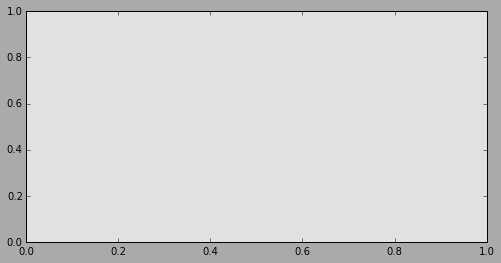

In [3]:
# create a matplotlib figure 
fig = plt.figure(figsize=(8, 4), facecolor='#aaaaaa')

# add the axes plotting area to the figure
ax = fig.add_axes((0.1, 0.1, 0.8, 0.8), axisbg='#e1e1e1')

While the `add_axes` function gives you total control over where the plotting panels appear in your `Figure`, in practice you will probably be adding additional panels using a layout manager. 

# Layout Managers
They work hard so you don't have to.

## `plt.subplots()`

[matplotlib.pyplot.subplots documentation](http://matplotlib.org/1.4.1/api/pyplot_api.html#matplotlib.pyplot.subplots)

Probably the easiest, and most frequently seen way to make a grid layout, the `subplots` function returns a tuple of a figure, and a single axis object or an array of axis objects, depending on what is passed to the function.  

In [4]:
# create some sine waves for plotting

x = np.linspace(-2*np.pi, 2*np.pi, 100)

y1 = np.sin(x)
y2 = 2*np.sin(x)
y3 = np.sin(2*x)
y4 = 2*np.sin(2*x)

By default, `plt.subplots()` will put all plot calls on the same `axes` instance. 

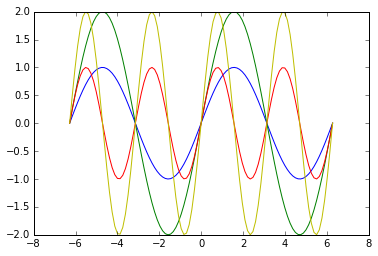

In [5]:
fig,ax = plt.subplots()

# this controls the colors the plot cycles through
#mpl.rc('axes', color_cycle=['b', 'g', 'r', 'y'])

ax.plot(x,y1, label='sin(x)', c='b')
ax.plot(x,y2, label='2 sin(x)', c='g')
ax.plot(x,y3, label='sin(2x)', c='r')
ax.plot(x,y4, label='2 sin(2x)', c='y')


You can plot each chart in its own panel by passing values for `ncols` and `nrows`:

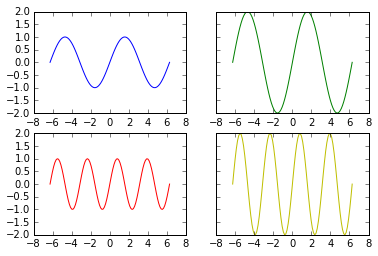

In [6]:
# The sharey=True argument tells matplotlib that you want the y axis to be the same scale
# for all axes panels. This is the case here becuase if we allow the y limits to best fit 
# the graph, the sine functions will look identical.

fig,ax = plt.subplots(ncols=2,nrows=2, sharey=True)

ax[0,0].plot(x,y1, label='sin(x)', c ='b')
ax[0,1].plot(x,y2, label='2 sin(x)', c='g')
ax[1,0].plot(x,y3, label='sin(2x)', c='r')
ax[1,1].plot(x,y4, label='2 sin(2x)', c='y')

Notice that in this case the variable `ax` is a 2x2 np.array of `axes` instances. In order to plot on any specific instance, we need to specifiy its position before plotting. This could also be done using control flows:

### Exercise 2: Plot out our 4 sine functions using a loop or list comprehension. 
Hint: Use the `ax` indicies that we explicitly called when plotting above.

In [7]:
# Your amazing code goes here

__<font size="3">Beware, here be dragons:__ </font><font size="5">  🐉🐉🐉</font>

When calling for a single row or column, `plt.subplots` will collapes to a 1-dimensional indexed array. Note that the indexing only requires a single index, unlike before:

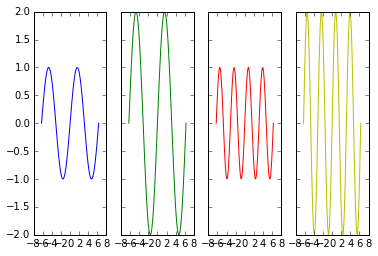

In [8]:
fig,ax = plt.subplots(ncols=4,nrows=1, sharey=True)

ax[0].plot(x,y1, label='sin(x)', c ='b')
ax[1].plot(x,y2, label='2 sin(x)', c='g')
ax[2].plot(x,y3, label='sin(2x)', c='r')
ax[3].plot(x,y4, label='2 sin(2x)', c='y')

If for some reason you prefer the same indexing as before, set the argument `squeeze=False`:

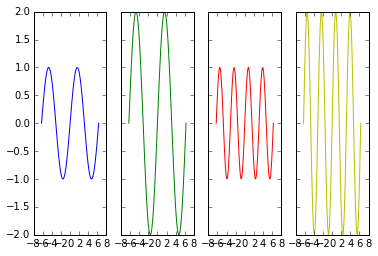

In [9]:
fig,ax = plt.subplots(ncols=4,nrows=1, squeeze=False, sharey=True)

ax[0,0].plot(x,y1, label='sin(x)', c ='b')
ax[0,1].plot(x,y2, label='2 sin(x)', c='g')
ax[0,2].plot(x,y3, label='sin(2x)', c='r')
ax[0,3].plot(x,y4, label='2 sin(2x)', c='y')

## `plt.subplot2grid()`

`plt.subplot2grid` is allows for more layout control than `plt.subplots` did, specifically in allowing for `axes` panels that span rows and/or columns.

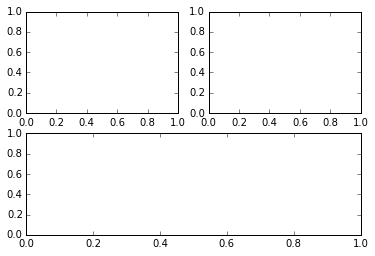

In [10]:
ax0 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

The `subplot2grid` function takes two mandatory tuples as arguments. The first tuple is the size of the overall grid, and will be the same for all subplots on the figure. The second tuple is the starting location of the specific panel you are calling. Additional `rowspan` and `colspan` arguments are added to the panels that will span rows or columns of the grid. Note that you do not have to explicitly call a `Figure` instance.

### Exercise 3a: Use `subplot2grid` to "rotate" the above layout. 
Your output should have one tall box next to two small boxes, one on top of the other. Once you have the layout, add plots to it. You can use our sine functions above, or get creative with whatver plots you'd like.

In [11]:
# More of your awesome code

### Exercise 3b: Expand you code to a 3x3 gridsize. 
Add more subplots, or increase the span widths/heights however you want.

In [12]:
# Even more awesome code

## `mpl.gridspec.GridSpec()`

And finally we come to `GridSpec`, the big daddy of layout managers. `GridSpec` allows for the most control, and is the only layout manager that will allow for rows and/or columns of different height. The extra control comes at a price: the code behind `GridSpec` is a bit more complicated, and requires more function calls. Note that GridSpec comes directly from `matplotlib` and not `matplotlib.pyplot`.

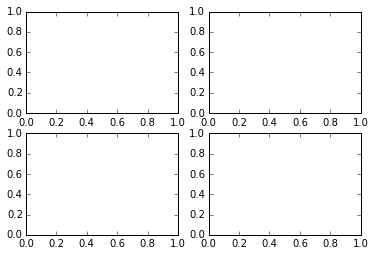

In [13]:
# import the Gridspec function for convenience
from matplotlib.gridspec import GridSpec

# plot a basic 2x2 grid 
fig = plt.figure()
gs = GridSpec(2,2)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

Note that unlike `subplot2grid`, `GridSpec` requires explict `Figure` and `add_supblot` calls. 
To show the power of `GridSpec`, we use the same code as above, but pass the `width_ratios` and `height_ratios` arguments:

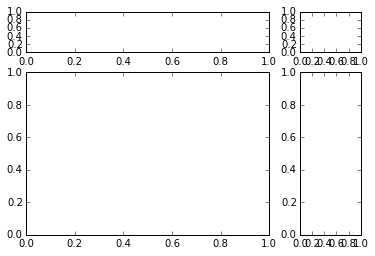

In [14]:
fig = plt.figure()
gs = GridSpec(2,2, width_ratios=[4, 1], height_ratios=[1, 4])

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

### Exercise 4: Rebuild your `subplot2grid` layout from Exercise 3b.
You should have all the tools you need to recreate your `subplot2grid` layout in `GridSpec`. Feel free to get fancy using the `width_ratios` and/or `height_ratios` arguments.

In [15]:
# Glorious code

There you have it. Now you should feel ready to take on the world of layouts in matplotlib (which is, admittedly, a small world, but you should still feel excited!). Remember that everything you've learned here is applicable to other plotting libraries built on matplotlib (looking at you, Seaborn). In fact, maybe we aren't quite done:

### Extra Credit
For all you Teacher's Pets out there.

Seaborn has a ton of really great plots functions that easily plot multi-panel matrices. They are, unsurprisingly, all build on top of `GridSpec`.

Now it's your turn to manually build out some examples of Seaborn's `pairplot`:

[`sns.pairplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot)

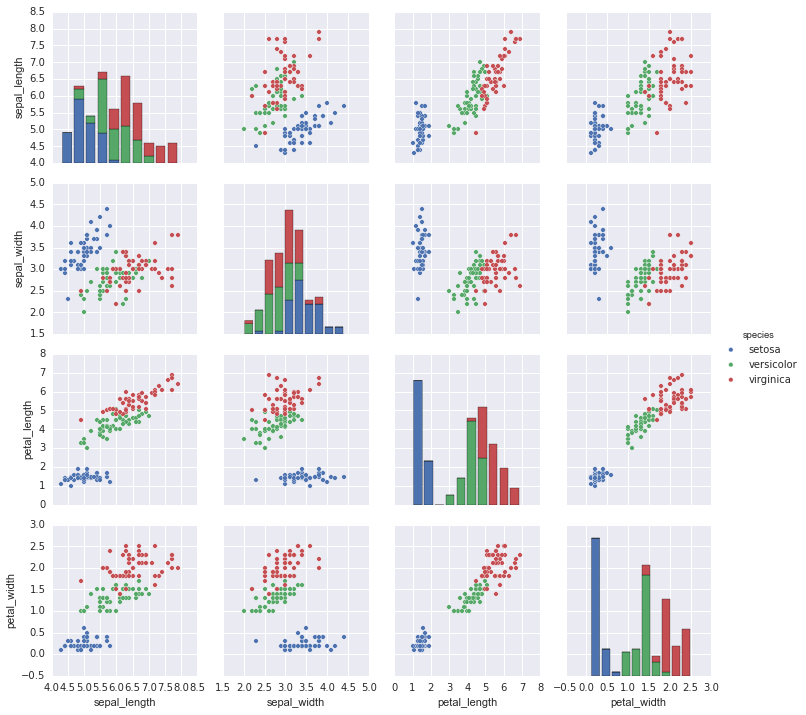

In [16]:
import seaborn as sns

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

And `sns.jointplot`. 

[`sns.jointplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html?highlight=jointplot#seaborn-jointplot)

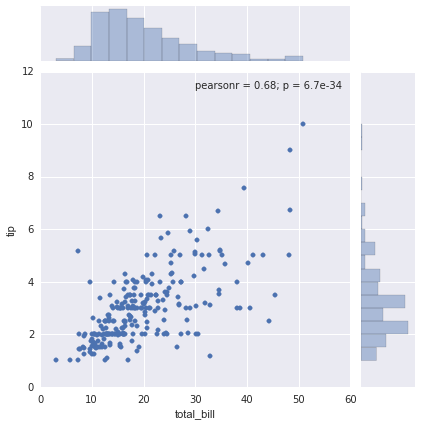

In [17]:
tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips)

In [18]:
# Your delightful code goes here

I promise, it's not as scary as it looks. I have faith in you! For great Justice!

Next time: Graph insets, axes formatting, legend and titles. 